# Introduction to smiles

## Package requirements for tutorial
!pip install rdkit-pypi

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem
import mols2grid

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300,300
rdDepictor.SetPreferCoordGen(True)

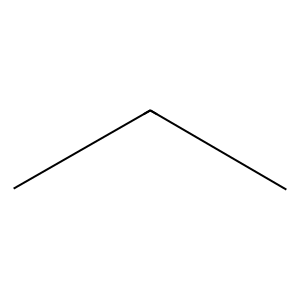

In [3]:
# Showing molecules using smiles
propane = Chem.MolFromSmiles('CCC')
propane

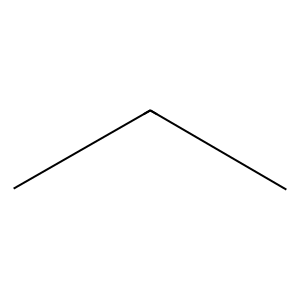

In [4]:
# Can show the molecule without variable as well
Chem.MolFromSmiles('CCC')

In [5]:
# Representing double and triple bonds
pentene = Chem.MolFromSmiles('CC=CCC')
pentyne = Chem.MolFromSmiles('CC#CCC')

# Hydrocarbons can also be shown
ethanol = Chem.MolFromSmiles('CCO')
# Displaying the molecules
mols2grid.display([propane, pentene, pentyne, ethanol]) # pentene, pentyne

MolGridWidget()

In [6]:
# Adding explicit hydrogens to display molecules
ethanol = Chem.MolFromSmiles("[CH3][CH2][OH]")
ethanol_radical = Chem.MolFromSmiles("[CH2][CH2][OH]")

mols2grid.display([ethanol, ethanol_radical])

MolGridWidget()

In [7]:
# Charges in smiles
ethylamine = Chem.MolFromSmiles("CC[NH3+]")
acetate = Chem.MolFromSmiles("CC(=O)[O-]")
mols2grid.display([ethylamine, acetate])

MolGridWidget()

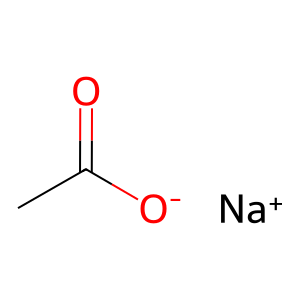

In [8]:
#Showing molecules with no covalent bonds like salts
acetate_salt = Chem.MolFromSmiles("CC(=O)[O-].[Na+]")
acetate_salt

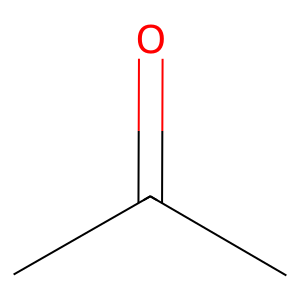

In [9]:
# Branching molecules with smailes. i.e carbonyl group
acetone = Chem.MolFromSmiles("CC(=O)C")
acetone

In [10]:
#Adding multiple compounds usinf a text buffer and list
# Text buffer
compounds = '''CC(=O)C acetone
C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid'''

# Splitting up text buffer
smiles_list = [x.split(" ",1) for x in compounds.split("\n")]
smiles_list

[['CC(=O)C', 'acetone'],
 ['C(C)(C)O', 'isopropanol'],
 ['C(Cl)(Cl)(Cl)Cl', 'carbon tetrachloride'],
 ['CC(=O)O', 'acetic acid']]

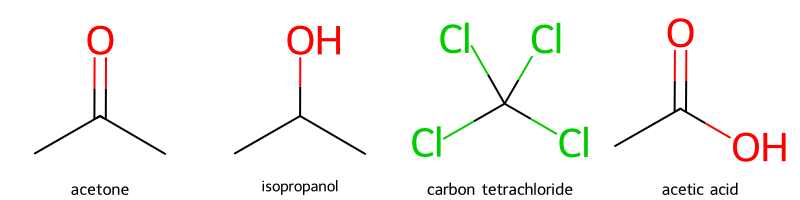

In [11]:
# Make a definition to view the ligands split up into the smiles list
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    compound_name = []
    for smiles, name in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
        compound_name.append(name)
    return MolsToGridImage(mol_list, legends=compound_name, molsPerRow=4)

display_structures(smiles_list)

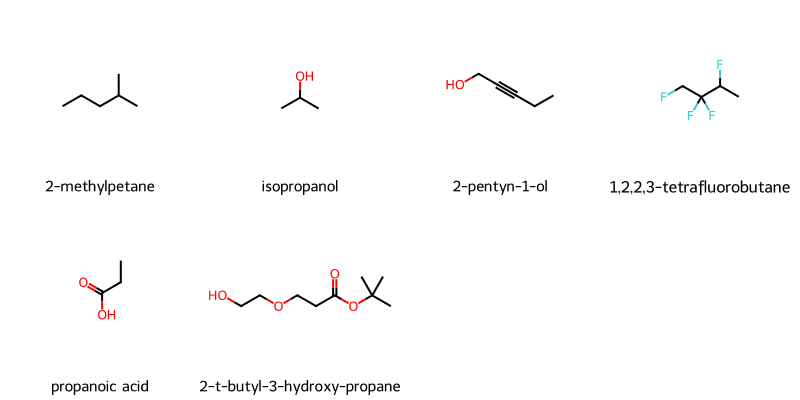

In [12]:
#Excercise

compounds = '''CCCC(C)C 2-methylpetane
CC(O)C isopropanol
CCC#CCO 2-pentyn-1-ol
CC(C(CF)(F)F)F 1,2,2,3-tetrafluorobutane
CCC(=O)O propanoic acid
CC(C)(C)OC(=O)CCOCCO 2-t-butyl-3-hydroxy-propane'''

# Splitting up text buffer
smiles_list = [x.split(" ",1) for x in compounds.split("\n")]

#Generating strcuture images. Smiles list obtained from spit_text_buffer definition
display_structures(smiles_list)

In [13]:
# Chemical ring strcutures in smiles
# Rings are shown with a closure digit
cyclohexane = Chem.MolFromSmiles('C1CCCCC1')
cyclopentene = Chem.MolFromSmiles('C1CCC=C1')

mols2grid.display([cyclohexane, cyclopentene])

MolGridWidget()

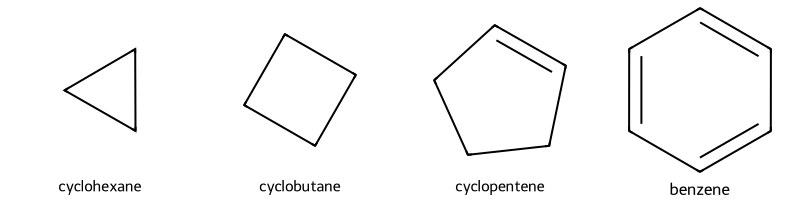

In [14]:
# define a text buffer for our examples
examples = """C1CC1 cyclohexane
C1CCC1 cyclobutane
C1CCC=C1 cyclopentene
C1=CC=CC=C1 benzene"""

#Splitting up text buffer
ring_smiles_list = [x.split(" ",1) for x in examples.split("\n")]

#Display structures
display_structures(ring_smiles_list)

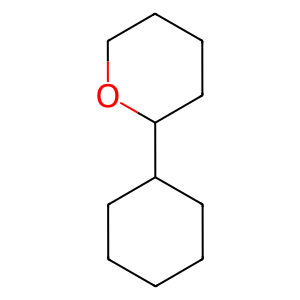

In [15]:
# Fused rings
fused_rings = Chem.MolFromSmiles('C1CCCCC1C1CCCCO1')
fused_rings

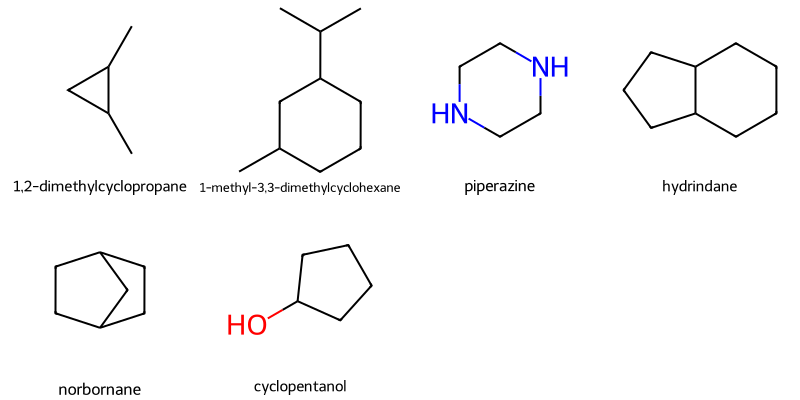

In [16]:
# Excercise with rings
compounds = '''CC1CC1C 1,2-dimethylcyclopropane
CC1CCCC(C1)C(C)C 1-methyl-3,3-dimethylcyclohexane
C1CNCCN1 piperazine
C1CCC2CCCC2C1 hydrindane
C1CC2CCC1C2 norbornane
OC1CCCC1 cyclopentanol'''

# Splitting up text buffer
smiles_list = [x.split(" ",1) for x in compounds.split("\n")]

#Generating strcuture images. Smiles list obtained from spit_text_buffer definition
display_structures(smiles_list)

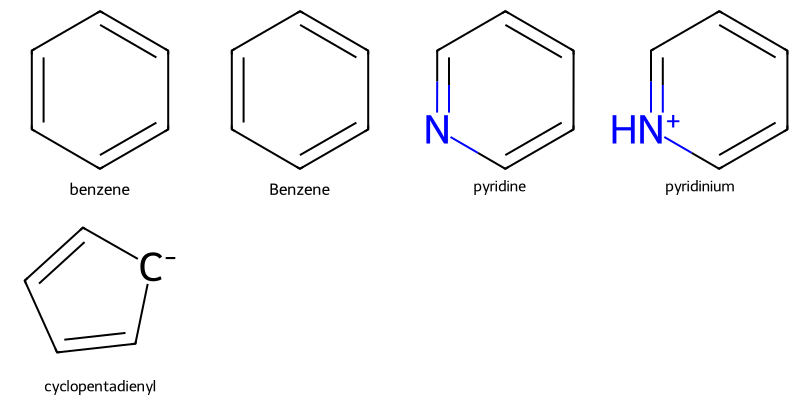

In [17]:
# Aromaticity in smiles
# Lowercase is used for aromaticity

example = """C1=CC=CC=C1 benzene
c1ccccc1 Benzene
c1ccccn1 pyridine
c1cccc[nH+]1 pyridinium
c1ccc[cH-]1 cyclopentadienyl"""

aromatic_smiles_list = [x.split(" ",1) for x in example.split("\n")]
display_structures(aromatic_smiles_list)



[19:54:31] SMILES Parse Error: syntax error while parsing: 12=C(C=CN2)C=CC=C1
[19:54:31] SMILES Parse Error: Failed parsing SMILES '12=C(C=CN2)C=CC=C1' for input: '12=C(C=CN2)C=CC=C1'


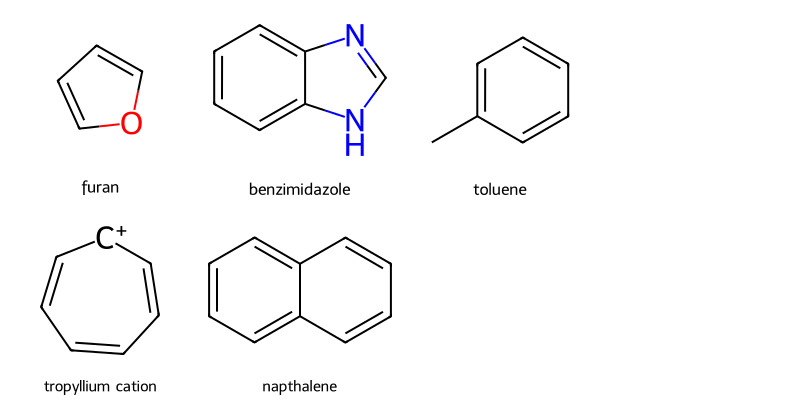

In [18]:
# Excercise

compounds = '''C1=COC=C1 furan
C1=CC=C2C(=C1)NC=N2 benzimidazole
Cc1ccccc1 toluene
12=C(C=CN2)C=CC=C1 indole
C1=CC=C[CH+]C=C1 tropyllium cation
c1c2ccccc2ccc1 napthalene'''

# Splitting up text buffer
smiles_list = [x.split(" ",1) for x in compounds.split("\n")]
display_structures(smiles_list)

In [20]:
# Stereochemistry in smiles
# Stereochemistry is shown with @@ for clockwise and @@ for counterclockwise
clockwise = Chem.MolFromSmiles('[C@H](F)(Cl)Br')
anticlockwise = Chem.MolFromSmiles('[C@@H](F)(Cl)Br')

mols2grid.display([clockwise, anticlockwise])

MolGridWidget()

In [21]:
# Isomerization E/Z in double bonds is as / or \ in smiles
trans_2_butene = Chem.MolFromSmiles('C/C=C/C')
cis_2_butene = Chem.MolFromSmiles('C/C=C\C')
mols2grid.display([trans_2_butene, cis_2_butene])


MolGridWidget()

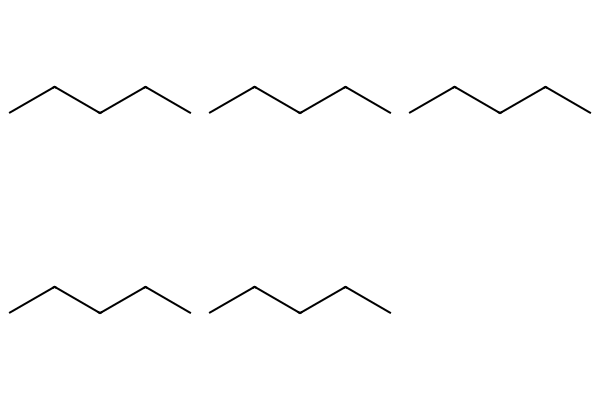

In [22]:
3 # Various ways to write smiles for the same molecule
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
Chem.Draw.MolsToGridImage(pentane_mol_list)

In [23]:
# Converting all kinds of smiles for the same molecule to canonical smiles
# This asssists ensuring filtering of duplicate molecules in VS or ML
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
for mol in pentane_mol_list:
    pentane_smiles = Chem.MolToSmiles(mol)
    print(pentane_smiles)

CCCCC
CCCCC
CCCCC
CCCCC
CCCCC


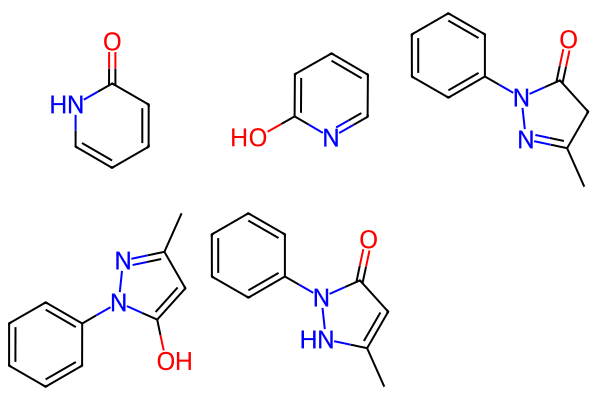

In [30]:
# Figuring out tuatomers in smiles
tautomer_smiles_list = ["C1C=CC(=O)NC=1","C1=CC=C(O)N=C1","CC1=NN(C(=O)C1)C2=CC=CC=C2", "Cc2cc(O)n(c1ccccc1)n2", "Cc2cc(=O)n(c1ccccc1)[nH]2"]
tautomer_mol_list = [Chem.MolFromSmiles(x) for x in tautomer_smiles_list]
Chem.Draw.MolsToGridImage(tautomer_mol_list)

In [32]:
# How RDkit deals with tautomers ad changes the smiles to canonical smiles
for mol in tautomer_mol_list:
    tautomer_smiles = Chem.MolToSmiles(mol)
    print(tautomer_smiles)

O=c1cccc[nH]1
Oc1ccccn1
CC1=NN(c2ccccc2)C(=O)C1
Cc1cc(O)n(-c2ccccc2)n1
Cc1cc(=O)n(-c2ccccc2)[nH]1


In [67]:
# Excercise finding unique compounds in text buffer below
import pandas as pd
import numpy as np

buff = """C(=N)(N)N.Cl 
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN 
Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1 
Cl.N=C(N)N 
CCC(C)C1(C(=O)NC(=O)[N-]C1=O)CC.[Na+] 
C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2CC[C@]4([C@H]3CC[C@]4(C)O)C 
CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+] 
Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.C(CN)N 
C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C 
c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)N""" 

smiles_list = buff.split("\n")  
smiles_sorted = []
for mol in sorted(Chem.MolToSmiles(Chem.MolFromSmiles(x), isomericSmiles=True) for x in smiles_list):
    smiles_sorted.append(mol)
    print(mol)

np.unique(smiles_sorted).tolist()




CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+]
CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+]
C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@@]2(C)[C@H]1CC[C@]2(C)O
C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@@]2(C)[C@H]1CC[C@]2(C)O
Cl.N=C(N)N
Cl.N=C(N)N
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN
Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1
Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1


['CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+]',
 'C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@@]2(C)[C@H]1CC[C@]2(C)O',
 'Cl.N=C(N)N',
 'Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN',
 'Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1']

In [39]:
smiles_list

['C(=N)(N)N.Cl compound 1',
 'Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN compound 2',
 'Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1 compound 3',
 'Cl.N=C(N)N compound 4',
 'CCC(C)C1(C(=O)NC(=O)[N-]C1=O)CC.[Na+] compound 5',
 'C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2CC[C@]4([C@H]3CC[C@]4(C)O)C compound 6',
 'CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+] compound 7',
 'Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.C(CN)N compound 8',
 'C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C compound 9',
 'c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)N compound 10']